Importovanje biblioteka i definisanje DATA_DIR-a


In [107]:
import pandas as pd
from pathlib import Path
import  matplotlib.pyplot as plt
import seaborn as sb


DATA_DIR = Path.cwd().parent / 'data'


Ucitavanje CSV fajla


In [108]:
csny = pd.read_csv(DATA_DIR / 'csny.csv')
csny

,track,album,album_type,artist,release_date,recording_period,recording_location,album_duration,album_genre,album_styles,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Chicago (CSNY),4 Way Street,live,"Crosby, Stills, Nash & Young",7/4/1971,NaN,NaN,1:49:44,Pop/Rock,"Contemporary Pop/Rock, Singer/Songwriter, Albu...",...,9,-10.210,0,0.0330,0.9120,0.000017,0.8660,0.405,147.037,4
1,Find the Cost of Freedom,4 Way Street,live,"Crosby, Stills, Nash & Young",7/4/1971,NaN,NaN,1:49:44,Pop/Rock,"Contemporary Pop/Rock, Singer/Songwriter, Albu...",...,8,-18.311,1,0.0348,0.7140,0.000010,0.2700,0.575,75.233,4
2,King Midas in Reverse,4 Way Street,live,"Crosby, Stills, Nash & Young",7/4/1971,NaN,NaN,1:49:44,Pop/Rock,"Contemporary Pop/Rock, Singer/Songwriter, Albu...",...,1,-13.016,1,0.2800,0.6890,0.000000,0.7020,0.464,155.204,4
3,Medley,4 Way Street,live,"Crosby, Stills, Nash & Young",7/4/1971,NaN,NaN,1:49:44,Pop/Rock,"Contemporary Pop/Rock, Singer/Songwriter, Albu...",...,8,-12.981,1,0.0503,0.4940,0.000253,0.9410,0.411,140.527,4
4,Ohio (CSNY),4 Way Street,live,"Crosby, Stills, Nash & Young",7/4/1971,NaN,NaN,1:49:44,Pop/Rock,"Contemporary Pop/Rock, Singer/Songwriter, Albu...",...,2,-7.928,0,0.0372,0.0274,0.000001,0.9320,0.677,161.686,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Love Work Out,Wind on the Water,studio,David Crosby,1975,NaN,NaN,40:57:00,Pop/Rock,"Singer/Songwriter, Soft Rock, Contemporary Pop...",...,9,-9.474,0,0.0307,0.1080,0.002350,0.2540,0.611,82.658,4
770,Low Down Payment,Wind on the Water,studio,David Crosby,1975,NaN,NaN,40:57:00,Pop/Rock,"Singer/Songwriter, Soft Rock, Contemporary Pop...",...,7,-11.605,1,0.0382,0.5670,0.049800,0.7380,0.513,150.695,4
771,Mama Lion,Wind on the Water,studio,David Crosby,1975,NaN,NaN,40:57:00,Pop/Rock,"Singer/Songwriter, Soft Rock, Contemporary Pop...",...,4,-10.592,0,0.0432,0.4230,0.008030,0.1100,0.556,125.519,3
772,Naked In The Rain,Wind on the Water,studio,David Crosby,1975,NaN,NaN,NaN,NaN,NaN,...,7,-16.339,1,0.0268,0.7800,0.000384,0.0907,0.358,84.995,4


Uvid u NA vrednosti

In [109]:
csny.isna().sum()

track                   0
album                   0
album_type              0
artist                  0
release_date            0
recording_period      389
recording_location    372
album_duration        190
album_genre           190
album_styles          195
album_moods           243
album_themes          293
genres                448
styles                459
moods                 479
themes                562
composers             216
producers             354
vocals                354
user_rating           238
duration                0
popularity              0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
dtype: int64

In [110]:
csny.isna().sum().sum()

np.int64(4982)

Brisanje kolona sa NA vrednostima

In [111]:
csny.dropna(axis=1, how='any', inplace=True)
csny.isna().sum().sum()

np.int64(0)

Izbacivanje redova gde su Artisti Al Kooper i Mike Bloomfield i kreiranje novog dataseta

In [112]:
csny.shape

(774, 19)

In [113]:
csny.loc[csny.artist.isin(['Mike Bloomfield', 'Al Kooper'])]

,track,album,album_type,artist,release_date,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
683,Albert's Shuffle,Super Session,studio,Mike Bloomfield,1968,413800,34,0.451,0.613,0,-7.863,1,0.0266,0.086400,0.716000,0.5650,0.659,98.142,4
684,Blues for Nothing,Super Session,studio,Mike Bloomfield,1968,255066,30,0.272,0.548,0,-9.059,1,0.0439,0.219000,0.050400,0.2470,0.628,184.992,3
685,Fat Grey Cloud,Super Session,studio,Mike Bloomfield,1968,278600,16,0.314,0.409,7,-9.425,1,0.0395,0.635000,0.660000,0.8770,0.421,178.378,3
687,His Holy Modal Majesty,Super Session,studio,Mike Bloomfield,1968,552933,20,0.235,0.721,4,-7.317,0,0.0539,0.016800,0.405000,0.0835,0.356,62.875,4
688,"It Takes a Lot to Laugh, It Takes a Train to Cry",Super Session,studio,Al Kooper,1968,209600,25,0.450,0.700,0,-9.477,1,0.0274,0.000424,0.000054,0.2770,0.819,93.898,4
689,Man's Temptation,Super Session,studio,Mike Bloomfield,1968,204693,20,0.614,0.524,5,-9.446,1,0.0285,0.114000,0.000004,0.1580,0.607,89.596,4
690,Really,Super Session,studio,Mike Bloomfield,1968,326173,30,0.378,0.547,0,-9.312,1,0.0321,0.023900,0.408000,0.1790,0.437,81.254,3
692,Stop,Super Session,studio,Mike Bloomfield,1968,258799,34,0.435,0.607,9,-8.332,1,0.0490,0.256000,0.149000,0.1070,0.620,87.237,4


In [114]:
csny.loc[csny.artist.str.contains('Mike Bloomfield') | csny.artist.str.contains('Al Kooper')]

,track,album,album_type,artist,release_date,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
683,Albert's Shuffle,Super Session,studio,Mike Bloomfield,1968,413800,34,0.451,0.613,0,-7.863,1,0.0266,0.086400,0.716000,0.5650,0.659,98.142,4
684,Blues for Nothing,Super Session,studio,Mike Bloomfield,1968,255066,30,0.272,0.548,0,-9.059,1,0.0439,0.219000,0.050400,0.2470,0.628,184.992,3
685,Fat Grey Cloud,Super Session,studio,Mike Bloomfield,1968,278600,16,0.314,0.409,7,-9.425,1,0.0395,0.635000,0.660000,0.8770,0.421,178.378,3
687,His Holy Modal Majesty,Super Session,studio,Mike Bloomfield,1968,552933,20,0.235,0.721,4,-7.317,0,0.0539,0.016800,0.405000,0.0835,0.356,62.875,4
688,"It Takes a Lot to Laugh, It Takes a Train to Cry",Super Session,studio,Al Kooper,1968,209600,25,0.450,0.700,0,-9.477,1,0.0274,0.000424,0.000054,0.2770,0.819,93.898,4
689,Man's Temptation,Super Session,studio,Mike Bloomfield,1968,204693,20,0.614,0.524,5,-9.446,1,0.0285,0.114000,0.000004,0.1580,0.607,89.596,4
690,Really,Super Session,studio,Mike Bloomfield,1968,326173,30,0.378,0.547,0,-9.312,1,0.0321,0.023900,0.408000,0.1790,0.437,81.254,3
692,Stop,Super Session,studio,Mike Bloomfield,1968,258799,34,0.435,0.607,9,-8.332,1,0.0490,0.256000,0.149000,0.1070,0.620,87.237,4


In [115]:
csny_clean = csny.drop(csny.loc[csny.artist.str.contains('Mike Bloomfield') | csny.artist.str.contains('Al Kooper')].index)

In [116]:
csny_clean.shape

(766, 19)

Čuvanje novog dataseta u csny_clean.csv

In [117]:
csny_clean.to_csv(DATA_DIR / 'csny_clean.csv')

csny_novi = pd.read_csv(DATA_DIR / 'csny_clean.csv')  #OVO NIJE POTREBNO MOŽETE ODMAH SA csny_clean

Izvlačenje godina iz kolone release_date

In [118]:
csny_novi['release_date']

0      7/4/1971
1      7/4/1971
2      7/4/1971
3      7/4/1971
4      7/4/1971
         ...   
761        1975
762        1975
763        1975
764        1975
765        1975
Name: release_date, Length: 766, dtype: object

In [119]:
def izvuci_godinu(value):
    #IMATE 3 FORMATA U release_date
    #1996
    #1982-21-06
    #10/7/2012
    vrednost = str(value).strip()
    if vrednost.isdigit() and len(vrednost) == 4:
        return int(vrednost)
    if '/' in vrednost :
        _, _, godina = vrednost.split('/')
        return int(godina)
    if '-' in value:
        godina, _, _ = vrednost.split('-')
        return int(godina)


In [120]:
csny_novi['year'] = csny_novi['release_date'].apply(izvuci_godinu)
csny_novi['year']

0      1971
1      1971
2      1971
3      1971
4      1971
       ... 
761    1975
762    1975
763    1975
764    1975
765    1975
Name: year, Length: 766, dtype: int64

Provera NA vrednosti

In [121]:
csny_novi.isna().sum().sum()

np.int64(0)

In [122]:
csny_novi.year.dtypes

dtype('int64')

Postavljanje year kolone ispred release_date

In [123]:
#OVO MOŽETE I SA REINDEX ALI OVAKO JE LAKŠE
kolone = csny_novi.columns.tolist()
kolone.remove('year')
release_date_index = kolone.index('release_date')
kolone.insert(release_date_index, 'year')

csny_novi = csny_novi[kolone]
csny_novi

,Unnamed: 0,track,album,album_type,artist,year,release_date,duration,popularity,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,Chicago (CSNY),4 Way Street,live,"Crosby, Stills, Nash & Young",1971,7/4/1971,190826,33,0.555,...,9,-10.210,0,0.0330,0.9120,0.000017,0.8660,0.405,147.037,4
1,1,Find the Cost of Freedom,4 Way Street,live,"Crosby, Stills, Nash & Young",1971,7/4/1971,141200,24,0.384,...,8,-18.311,1,0.0348,0.7140,0.000010,0.2700,0.575,75.233,4
2,2,King Midas in Reverse,4 Way Street,live,"Crosby, Stills, Nash & Young",1971,7/4/1971,223266,22,0.419,...,1,-13.016,1,0.2800,0.6890,0.000000,0.7020,0.464,155.204,4
3,3,Medley,4 Way Street,live,"Crosby, Stills, Nash & Young",1971,7/4/1971,580666,27,0.458,...,8,-12.981,1,0.0503,0.4940,0.000253,0.9410,0.411,140.527,4
4,4,Ohio (CSNY),4 Way Street,live,"Crosby, Stills, Nash & Young",1971,7/4/1971,214133,26,0.273,...,2,-7.928,0,0.0372,0.0274,0.000001,0.9320,0.677,161.686,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,769,Love Work Out,Wind on the Water,studio,David Crosby,1975,1975,290800,13,0.533,...,9,-9.474,0,0.0307,0.1080,0.002350,0.2540,0.611,82.658,4
762,770,Low Down Payment,Wind on the Water,studio,David Crosby,1975,1975,295293,8,0.372,...,7,-11.605,1,0.0382,0.5670,0.049800,0.7380,0.513,150.695,4
763,771,Mama Lion,Wind on the Water,studio,David Crosby,1975,1975,196160,12,0.480,...,4,-10.592,0,0.0432,0.4230,0.008030,0.1100,0.556,125.519,3
764,772,Naked In The Rain,Wind on the Water,studio,David Crosby,1975,1975,149706,17,0.629,...,7,-16.339,1,0.0268,0.7800,0.000384,0.0907,0.358,84.995,4


Prikazivanje prosečnog danceability-ja po godinama

In [124]:
prosecan_danceability_po_godinama = csny_novi.groupby('year')['danceability'].mean()
prosecan_danceability_po_godinama

year
1968    0.391500
1969    0.488824
1970    0.509053
1971    0.449780
1972    0.531000
1973    0.549000
1974    0.552833
1975    0.510424
1976    0.544840
1977    0.546167
1978    0.503909
1980    0.544250
1982    0.605722
1983    0.405333
1984    0.728000
1985    0.565444
1986    0.661278
1988    0.578750
1989    0.615633
1990    0.594111
1992    0.506143
1993    0.574900
1994    0.707909
1995    0.388250
1996    0.267083
1998    0.369286
1999    0.587750
2000    0.508400
2004    0.588789
2005    0.559040
2006    0.470200
2007    0.571286
2008    0.501455
2009    0.478609
2010    0.353000
2012    0.403400
2013    0.426600
2014    0.528857
2015    0.462438
2016    0.609500
2017    0.562750
2018    0.492424
2020    0.510614
2021    0.570733
2022    0.470000
2023    0.496000
Name: danceability, dtype: float64

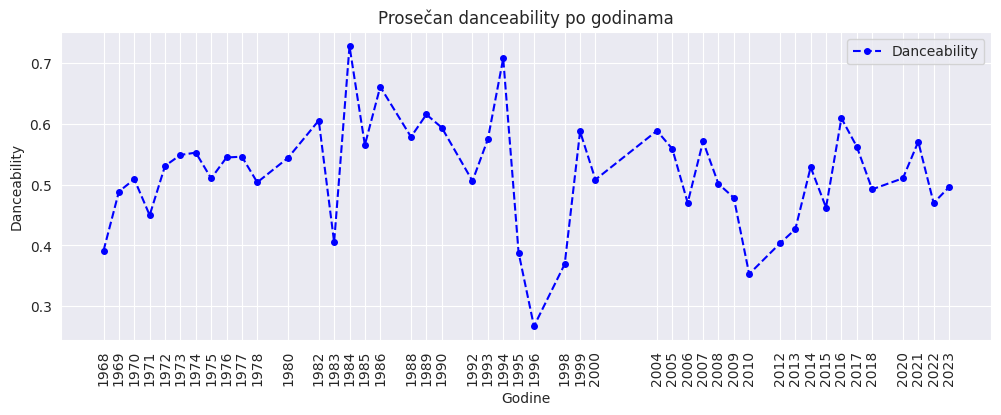

In [125]:
x = prosecan_danceability_po_godinama.index.tolist()
y = prosecan_danceability_po_godinama.values.tolist()
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, color='blue', linestyle='--', marker='o', markersize=4, label='Danceability')
ax.set_title('Prosečan danceability po godinama')
ax.set_xlabel('Godine')
ax.set_ylabel('Danceability')
ax.set_xticks(x)
ax.tick_params(axis='x', rotation=90)
ax.legend()
plt.show()

Box plot sa valencama pesama na osnovu modaliteta, major = 1, minor = 0

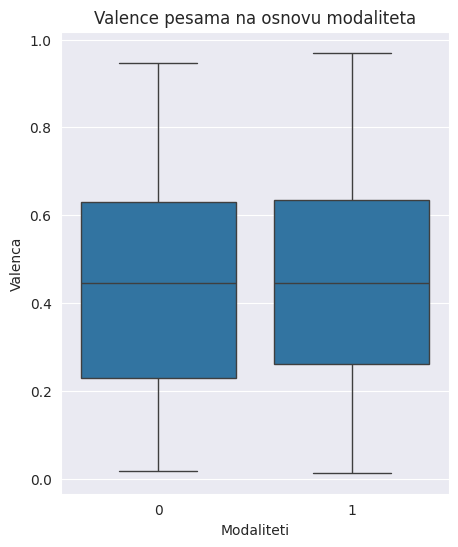

In [126]:
fig, ax = plt.subplots(figsize=(5, 6))
sb.boxplot(data=csny_novi, x='mode', y='valence', ax=ax)
ax.set_title('Valence pesama na osnovu modaliteta')
ax.set_xlabel('Modaliteti')
ax.set_ylabel('Valenca')
plt.show()